In [1]:
import seaborn as sn
import numpy as np
import pandas as pd
import statistics as st
import random as rd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
np.random.seed(42)
data=pd.read_csv('C:/Users/91830/Downloads/diabetes.csv')

In [3]:
print("Original dataset:")
print(data.head())

# Check for missing values
print("\nMissing values before cleaning:")
print(data.isnull().sum())

# Handling missing values
# Assuming missing values are represented by 0 for numerical attributes
# Replace 0s with NaN for relevant columns
columns_with_zeros_as_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
data[columns_with_zeros_as_missing] = data[columns_with_zeros_as_missing].replace(0, pd.NA)

# Check for duplicates
duplicate_rows = data.duplicated()
print("\nNumber of duplicate rows:", duplicate_rows.sum())

# Remove duplicate rows
data = data.drop_duplicates()

# Final check for missing values
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Save cleaned data to a new CSV file
data.to_csv("data_clean.csv", index=False)

# Display the first few rows of the cleaned dataset
print("\nCleaned dataset:")
print(data.head())


Original dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values before cleaning:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome     

In [4]:
sample_population=data.sample(n= 25, random_state= 40)

In [5]:
sample_population.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
370,3,173,82,48,465,38.4,2.137,25,1
388,5,144,82,26,285,32.0,0.452,58,1
611,3,174,58,22,194,32.9,0.593,36,1
550,1,116,70,28,<NA>,27.4,0.204,21,0
232,1,79,80,25,37,25.4,0.583,22,0


In [6]:
# Replace missing values (zeros) with NaN
data.replace({'Glucose': {0: pd.NA}}, inplace=True)

# Calculate the mean of non-missing values
glucose_mean = data['Glucose'].mean()

print("Mean Glucose value:", glucose_mean)

Mean Glucose value: 121.6867627785059


In [7]:
# Drop missing values
data.dropna(subset=['Glucose'], inplace=True)

# Calculate the maximum value
glucose_max = data['Glucose'].max()

print("Maximum Glucose value:", glucose_max)

Maximum Glucose value: 199


In [8]:
population_mean=st.mean(data.loc[:,"Glucose"])
print(population_mean)

121.6867627785059


In [9]:
population_max=max(data.loc[:,"Glucose"])
print(population_max)

199


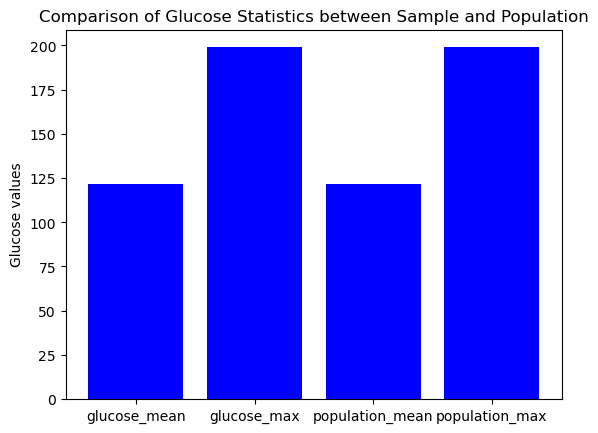

In [10]:
# Define data
categories = ['glucose_mean', 'glucose_max', 'population_mean', 'population_max']
values = [glucose_mean, glucose_max, population_mean, population_max]
colors = ['blue', 'blue', 'blue', 'blue']  # Assigning blue color to all bars

# Create bar plot
plt.bar(categories, values, color=colors)

# Add labels and title
plt.ylabel('Glucose values')
plt.title('Comparison of Glucose Statistics between Sample and Population')

# Display plot
plt.show()


# b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.

In [11]:
df=pd.DataFrame(data)

In [12]:
sample_population.replace({'BMI': {0: np.nan}}, inplace=True)

# Drop rows with missing values
sample_population.dropna(subset=['BMI'], inplace=True)

# Calculate the 98th percentile of the 'BMI' column for the sample population
sample_percentile = np.percentile(sample_population['BMI'], 98)

# Assuming `df` is your original dataframe containing the population data
# Replace missing values with NaN in the original dataframe
df.replace({'BMI': {0: np.nan}}, inplace=True)

# Drop rows with missing values in the original dataframe
df.dropna(subset=['BMI'], inplace=True)

# Calculate the 98th percentile of the 'BMI' column for the population
population_percentile = np.percentile(df['BMI'], 98)

print(f"98th Percentile BMI for Sample: {sample_percentile}")
print(f"98th Percentile BMI for Population: {population_percentile}")

98th Percentile BMI for Sample: 47.40399999999999
98th Percentile BMI for Population: 47.87800000000002


In [13]:
print(f"98th Percentile BMI for Sample: {sample_percentile}")
print(f"98th Percentile BMI for Population: {population_percentile}")

98th Percentile BMI for Sample: 47.40399999999999
98th Percentile BMI for Population: 47.87800000000002


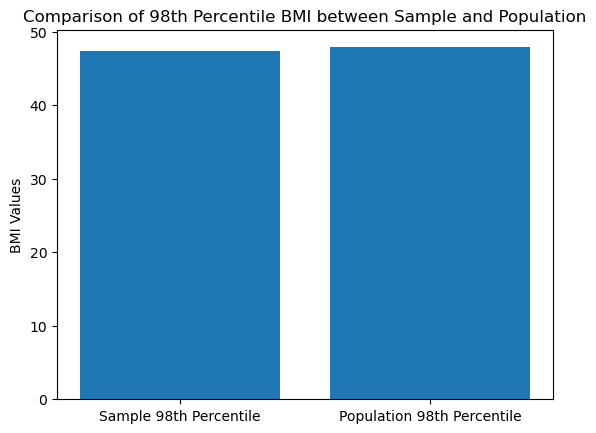

In [14]:
# Define data
categories = ['Sample 98th Percentile', 'Population 98th Percentile']
values = [sample_percentile, population_percentile]

# Create bar plot
plt.bar(categories, values)

# Add labels and title
plt.ylabel('BMI Values')
plt.title('Comparison of 98th Percentile BMI between Sample and Population')

# Display plot
plt.show()


# c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

In [15]:
# Check for missing values in the 'BloodPressure' column
missing_values_count = df['BloodPressure'].isnull().sum()
print("Number of missing values in 'BloodPressure' column:", missing_values_count)

# Drop missing values
df.dropna(subset=['BloodPressure'], inplace=True)


Number of missing values in 'BloodPressure' column: 28


In [16]:
np.random.seed(42)

In [17]:
num_samples = 1000
sample_size = len(df)

In [18]:
bootstrap_means = np.zeros(num_samples)
bootstrap_stds = np.zeros(num_samples)
bootstrap_percentiles = np.zeros(num_samples)

In [19]:
for i in range(num_samples):
    bootstrap_sample = np.random.choice(df['BloodPressure'], size=sample_size, replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_stds[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 95)


In [20]:
population_mean = np.mean(df['BloodPressure'])
population_std = np.std(df['BloodPressure'])
population_percentile = np.percentile(df['BloodPressure'], 95)

In [21]:
print(f"Population Mean BloodPressure: {population_mean}")
print(f"Population Standard Deviation BloodPressure: {population_std}")
print(f"Population 95th Percentile BloodPressure: {population_percentile}")

Population Mean BloodPressure: 72.40055248618785
Population Standard Deviation BloodPressure: 12.37131773325663
Population 95th Percentile BloodPressure: 91.70000000000005


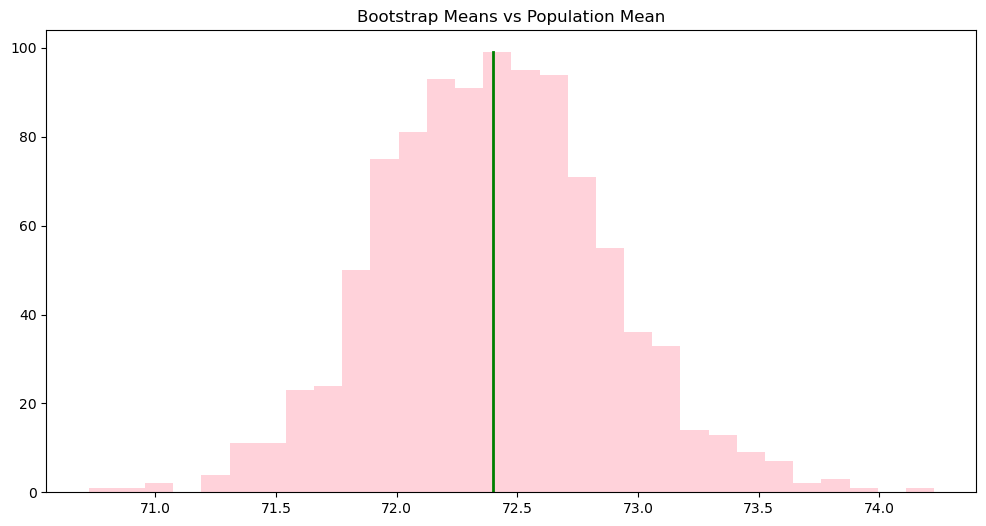

In [22]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot the histogram
n, bins, patches = plt.hist(bootstrap_means, bins=30, color='pink', alpha=0.7)

# Add a vertical line for the population mean
plt.plot([population_mean, population_mean], [0, max(n)], color='green', linewidth=2)

# Add title
plt.title('Bootstrap Means vs Population Mean')

# Show plot
plt.show()


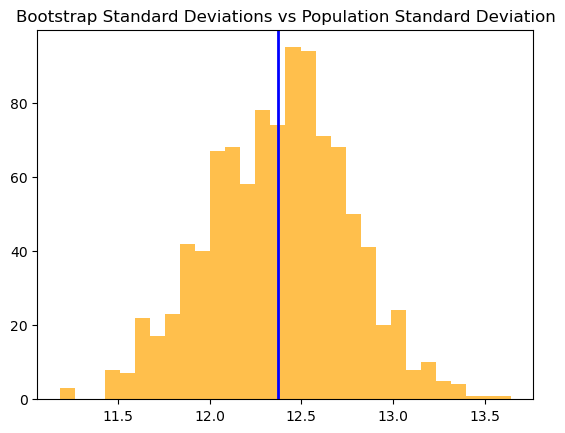

In [23]:
# Plot the histogram with a different color
plt.hist(bootstrap_stds, bins=30, color='orange', alpha=0.7)

# Add a vertical line for the population standard deviation with a different color
plt.axvline(population_std, color='blue', linewidth=2)

# Add title
plt.title('Bootstrap Standard Deviations vs Population Standard Deviation')

# Show plot
plt.show()


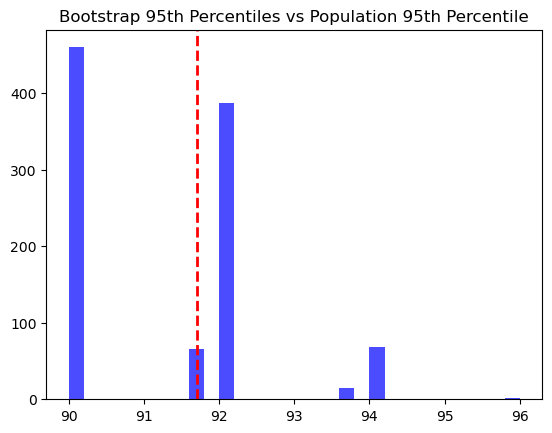

In [24]:
# Plot the histogram with a different color
plt.hist(bootstrap_percentiles, bins=30, color='blue', alpha=0.7)

# Add a vertical line for the population percentile with a different color and linestyle
plt.axvline(population_percentile, color='red', linestyle='dashed', linewidth=2)

# Add title
plt.title('Bootstrap 95th Percentiles vs Population 95th Percentile')

# Show plot
plt.show()
